In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from products.plot_settings import METEOFRANCE_VAR_NAME,NASA_L3_VAR_NAME,NASA_PSEUDO_L3_VAR_NAME
analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True)
analyses_dict = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

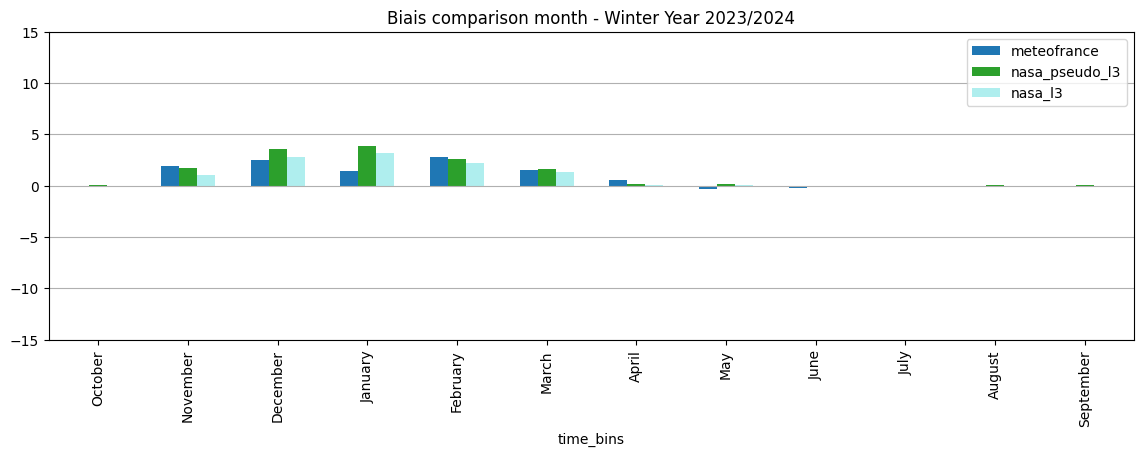

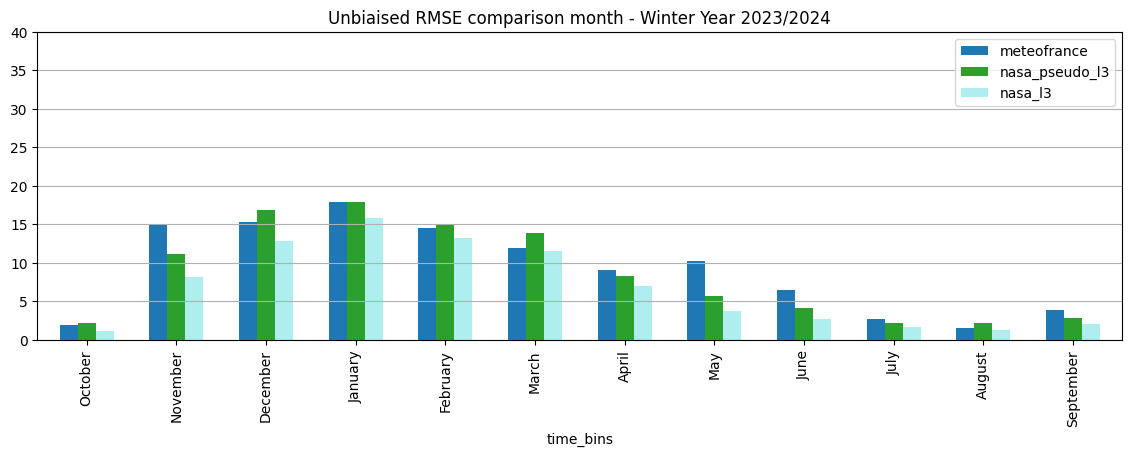

In [93]:
from evaluations.statistics_base import EvaluationVsHighResBase
from winter_year import WinterYear
from evaluations.uncertainty import  biais_barplots, postprocess_uncertainty_analysis, unbiaised_rmse_barplots

wy = WinterYear(2023,2024)
biais_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name='month', winter_year=wy)
unbiaised_rmse_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name='month', winter_year=wy)

In [2]:
mf_metrics_ds

<xarray.Dataset> Size: 116MB
Dimensions:             (biais_bins: 201, ref_bins: 13, sensor_zenith_bins: 9,
                         forest_mask_bins: 2, time: 307)
Coordinates:
  * biais_bins          (biais_bins) int64 2kB -100 -99 -98 -97 ... 97 98 99 100
  * ref_bins            (ref_bins) int64 104B 0 10 20 30 40 ... 80 90 99 100 205
  * sensor_zenith_bins  (sensor_zenith_bins) int64 72B 10 20 30 40 ... 70 80 255
  * forest_mask_bins    (forest_mask_bins) float64 16B 0.0 1.0
  * time                (time) datetime64[ns] 2kB 2023-10-01 ... 2024-09-30
Data variables:
    n_occurrences       (time, biais_bins, ref_bins, sensor_zenith_bins, forest_mask_bins) float64 116MB ...

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
from products.plot_settings import METEOFRANCE_VAR_NAME,NASA_L3_VAR_NAME,NASA_PSEUDO_L3_VAR_NAME
analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/uncertainty_test'
mf_metrics_ds = xr.load_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).sel(forest_mask_bins=0)
nasa_l3_metrics_ds = xr.load_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True).sel(forest_mask_bins=0)
nasa_pseudo_l3_metrics_ds = xr.load_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True).sel(forest_mask_bins=0)
analyses_dict = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}


/tmp/ipykernel_36682/3877699990.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(dataset.coords['aspect_bins'].values)
/tmp/ipykernel_36682/3877699990.py:26: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im,ax = ax[i], orientation = 'horizontal', label = variable, fraction = 0.05, pad = 0.1)
/tmp/ipykernel_36682/3877699990.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(dataset.coords['aspect_bins'].values)
/tmp/ipykernel_36682/3877699990.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(d

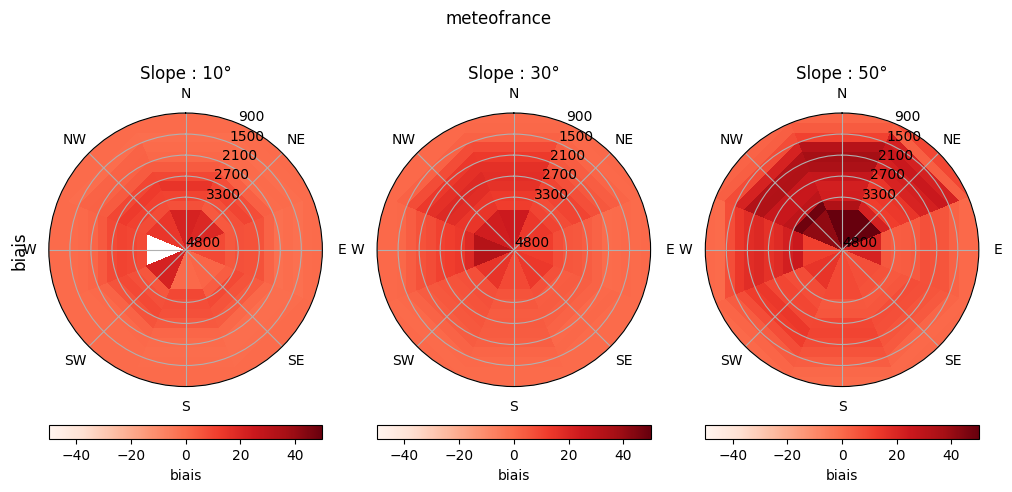

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from evaluations.statistics_base import EvaluationVsHighResBase
from evaluations.uncertainty import histograms_to_biais_rmse

variable = 'biais'
for product_name,dataset in analyses_dict.items():
    fig, ax = plt.subplots(1,3,figsize=(12,5),subplot_kw=dict(projection='polar'))
    dataset_reduced = dataset.groupby(['slope_bins', 'aspect_bins', 'altitude_bins']).map(histograms_to_biais_rmse).reindex_like(dataset)
    for i,slope in enumerate(dataset_reduced.coords['slope_bins'].values[:3]):
        ax[i].set_theta_direction(-1)
        ax[i].set_theta_zero_location('N')
        ax[i].set_xticklabels(dataset.coords['aspect_bins'].values)
        ax[i].set_rticks(dataset.coords['altitude_bins'].values[::2])
        ax[i].set_rlim(dataset.coords['altitude_bins'].values[-1],dataset.coords['altitude_bins'].values[0])
        ax[i].set_title('Slope : '+ str(slope)+'°')
        ax[0].set_ylabel(variable, labelpad = 15, fontsize = 12)

        im = ax[i].pcolor(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins),
                        np.array([0,*dataset.coords['altitude_bins'].values]),
                        dataset_reduced.data_vars[variable].sel(slope_bins = slope).transpose(), 
                        cmap = 'Reds',
                        vmin=-50,
                        vmax=50)

        fig.colorbar(im,ax = ax[i], orientation = 'horizontal', label = variable, fraction = 0.05, pad = 0.1)
        fig.suptitle(product_name)

In [ ]:

variable = 'unbiaised_rmse'
for product_name,dataset in analyses_dict.items():
    fig, ax = plt.subplots(1,3,figsize=(12,5),subplot_kw=dict(projection='polar'))
    dataset_reduced = dataset.groupby(['slope_bins', 'aspect_bins', 'altitude_bins']).map(histograms_to_biais_rmse).reindex_like(dataset)
    for i,slope in enumerate(dataset_reduced.coords['slope_bins'].values[:3]):
        ax[i].set_theta_direction(-1)
        ax[i].set_theta_zero_location('N')
        ax[i].set_xticklabels(dataset.coords['aspect_bins'].values)
        ax[i].set_rticks(dataset.coords['altitude_bins'].values[::2])
        ax[i].set_rlim(dataset.coords['altitude_bins'].values[-1],dataset.coords['altitude_bins'].values[0])
        ax[i].set_title('Slope : '+ str(slope)+'°')
        ax[0].set_ylabel(variable, labelpad = 15, fontsize = 12)

        im = ax[i].pcolor(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins),
                        np.array([0,*dataset.coords['altitude_bins'].values]),
                        dataset_reduced.data_vars[variable].sel(slope_bins = slope).transpose(), 
                        cmap = 'Reds',
                        vmin=-50,
                        vmax=50)

        fig.colorbar(im,ax = ax[i], orientation = 'horizontal', label = variable, fraction = 0.05, pad = 0.1)
        fig.suptitle(product_name)

In [56]:
nasa_l3_metrics_ds.sel(altitude_bins=4800).count()

<xarray.Dataset> Size: 24B
Dimensions:           ()
Coordinates:
    forest_mask_bins  int64 8B 0
    altitude_bins     int64 8B 4800
Data variables:
    n_occurrences     int64 8B 466

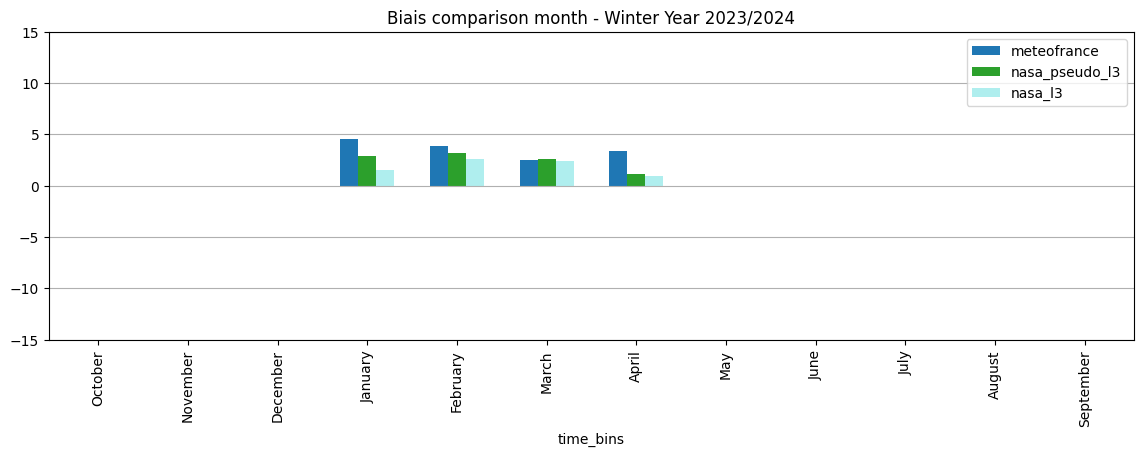

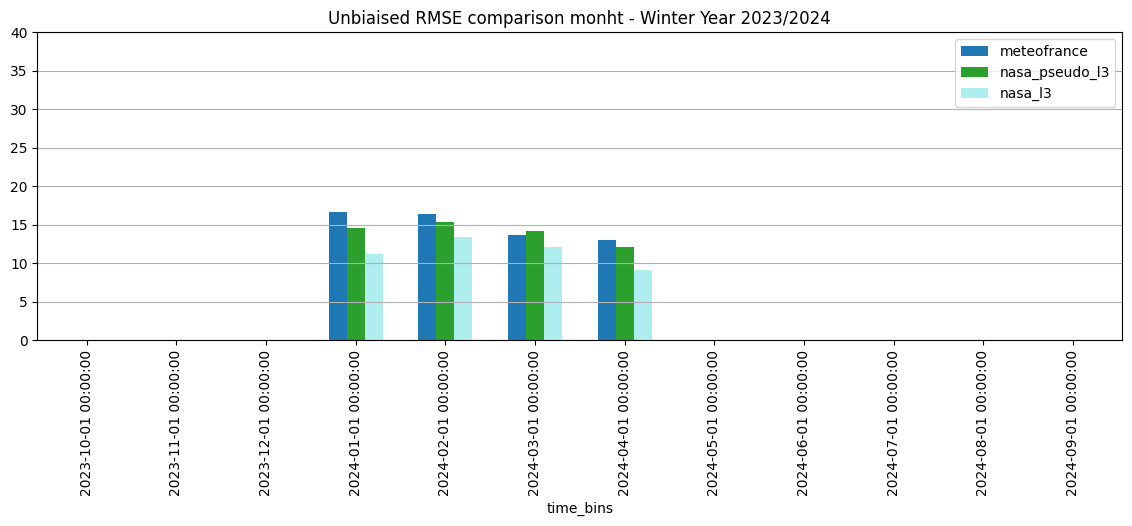

In [4]:
from evaluations.statistics_base import EvaluationVsHighResBase
from winter_year import WinterYear
from evaluations.uncertainty import  biais_barplots, postprocess_uncertainty_analysis, unbiaised_rmse_barplots

wy = WinterYear(2023,2024)
biais_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name='month', winter_year=wy)
unbiaised_rmse_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name='monht', winter_year=wy)

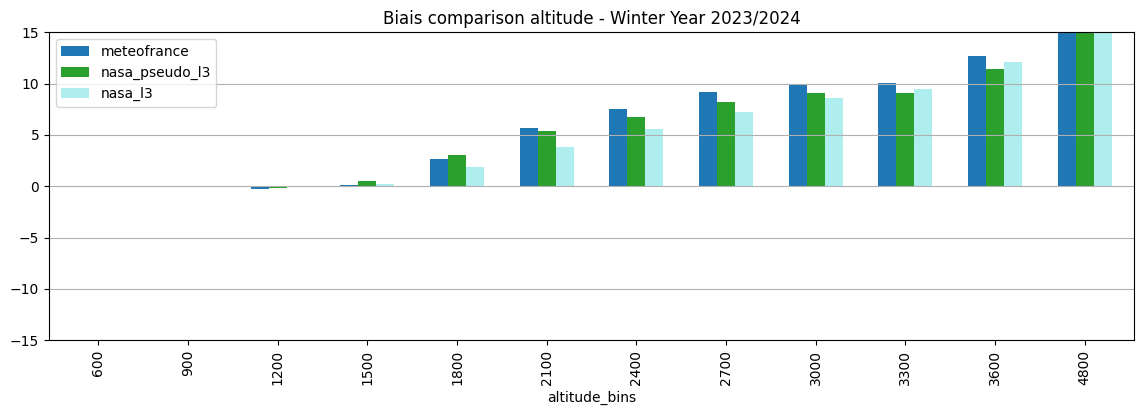

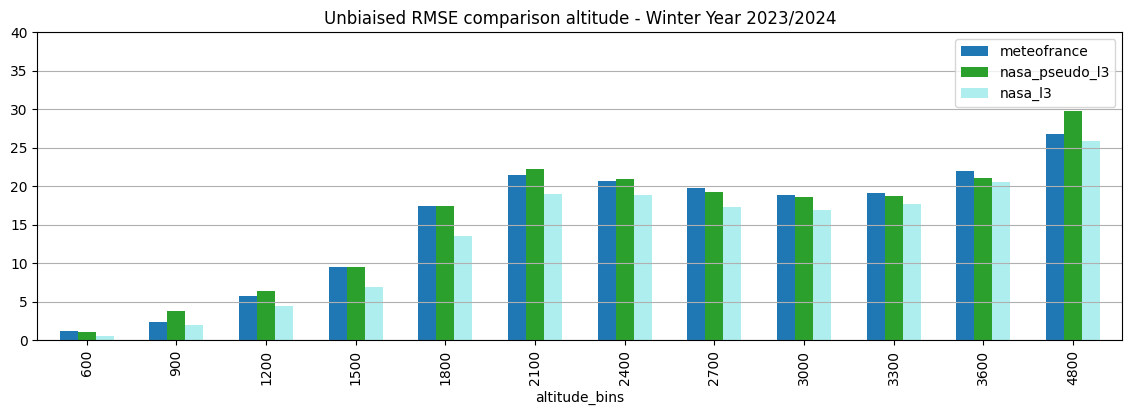

In [55]:
from evaluations.statistics_base import EvaluationVsHighResBase
from winter_year import WinterYear
from evaluations.uncertainty import  biais_barplots, postprocess_uncertainty_analysis, unbiaised_rmse_barplots

wy = WinterYear(2023,2024)
biais_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var='altitude_bins'), analysis_var_plot_name='altitude', winter_year=wy)
unbiaised_rmse_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var='altitude_bins'), analysis_var_plot_name='altitude', winter_year=wy)

In [2]:
import matplotlib.axes
import numpy as np
import matplotlib
def histograms_to_boxplot(metrics_ds : xr.Dataset, ax: matplotlib.axes.Axes):

    # def repeat_fun(metrics_ds):
    #     return np.repeat(metrics_ds['biais_bins'], repeats=metrics_ds['n_occurrences'])
    all_dims = list(metrics_ds.sizes.keys())
    all_dims.remove('biais_bins')
    metrics_squeezed = metrics_ds.sum(dim=all_dims)
    #data_to_plot = np.repeat(mf_metrics_ds.coords['biais_bins'], metrics_squeezed['n_occurrences'])
    data_to_plot = np.repeat(mf_metrics_ds.coords['biais_bins'], metrics_squeezed['n_occurrences'])
    return xr.Dataset(ax.boxplot(data_to_plot,widths=3, positions=[metrics_ds.coords['sensor_zenith_bins'].values[0]]))


/home/imperatoren/miniconda3/envs/viirs_env/lib/python3.12/site-packages/xarray/core/indexes.py:822: RuntimeWarning: '<' not supported between instances of 'Line2D' and 'Line2D', sort order is undefined for incomparable objects.
  index = self.index.union(other.index)


<xarray.Dataset> Size: 512B
Dimensions:             (whiskers: 16, caps: 16, boxes: 8, medians: 8,
                         fliers: 8, means: 0, sensor_zenith_bins: 8)
Coordinates:
  * whiskers            (whiskers) object 128B Line2D(_nolegend_) ... Line2D(...
  * caps                (caps) object 128B Line2D(_nolegend_) ... Line2D(_nol...
  * boxes               (boxes) object 64B Line2D(_child0) ... Line2D(_child49)
  * medians             (medians) object 64B Line2D(_nolegend_) ... Line2D(_n...
  * fliers              (fliers) object 64B Line2D(_nolegend_) ... Line2D(_no...
  * means               (means) float64 0B 
  * sensor_zenith_bins  (sensor_zenith_bins) int64 64B 10 20 30 40 50 60 70 80
Data variables:
    *empty*

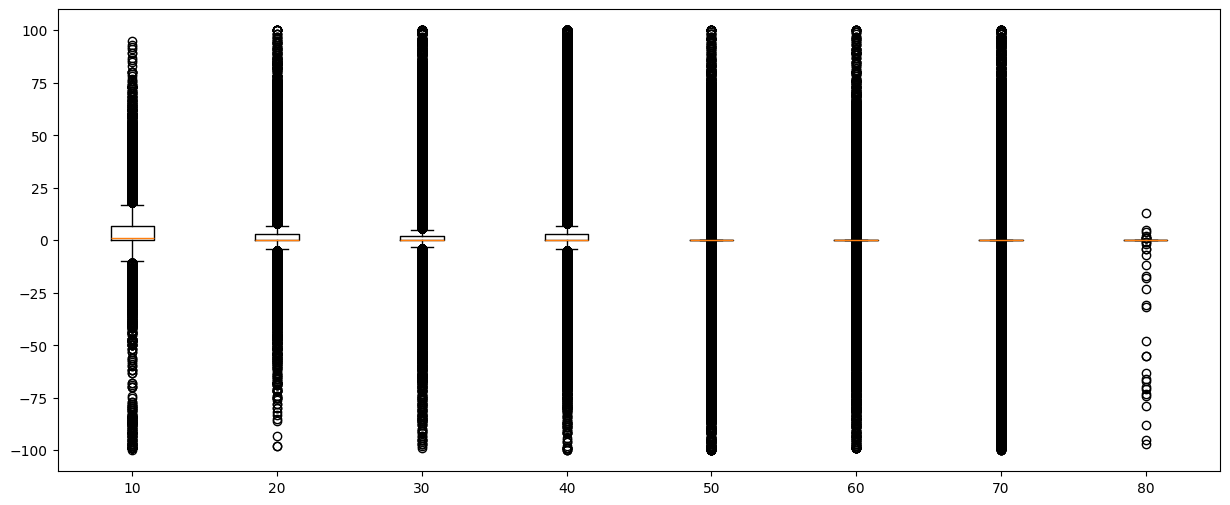

In [3]:
fig, ax = plt.subplots(figsize=(15,6))
mf_metrics_ds.isel(sensor_zenith_bins=slice(None, -1)).groupby('sensor_zenith_bins').map(histograms_to_boxplot, ax = ax)